In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mobile_sam.predictor_trt import PredictorTRT

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
predictor = PredictorTRT(
    image_encoder_engine="../data/mobile_sam_image_encoder.engine",
    mask_decoder_engine="../data/mobile_sam_mask_decoder.engine",
    image_encoder_size=1024
)

In [19]:
import PIL.Image

In [20]:
image = PIL.Image.open("../data/videos/pickleball_video/images/frame_00001.png")

In [21]:
predictor.set_image(image)

[07/20/2023-14:37:46] [TRT] [E] 3: [executionContext.cpp::validateInputBindings::1832] Error Code 3: API Usage Error (Parameter check failed at: runtime/api/executionContext.cpp::validateInputBindings::1832, condition: profileMinDims.d[i] <= dimensions.d[i]. Supplied binding dimension [1,3,1024,1024] for bindings[0] exceed min ~ max range at index 0, maximum dimension in profile is 16, minimum dimension in profile is 16, but supplied dimension is 1.
)
[07/20/2023-14:37:46] [TRT] [E] 1: [convBaseRunner.cpp::execute::271] Error Code 1: Cask (Cask convolution execution)


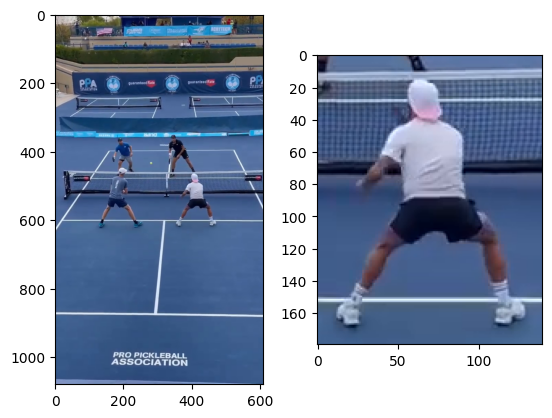

In [15]:
box = [340, 450, 480, 630]
plt.subplot(121)
plt.imshow(image)
plt.subplot(122)
plt.imshow(image.crop(box))
plt.show()

In [16]:
# box = [750, 370, 1590, 1220]

points = np.array([
    [box[0], box[1]],
    [box[2], box[3]]
])
point_labels = np.array([2, 3])

mask, iou_preds, low_res_mask = predictor.predict(
    points=points,
    point_labels=point_labels
)

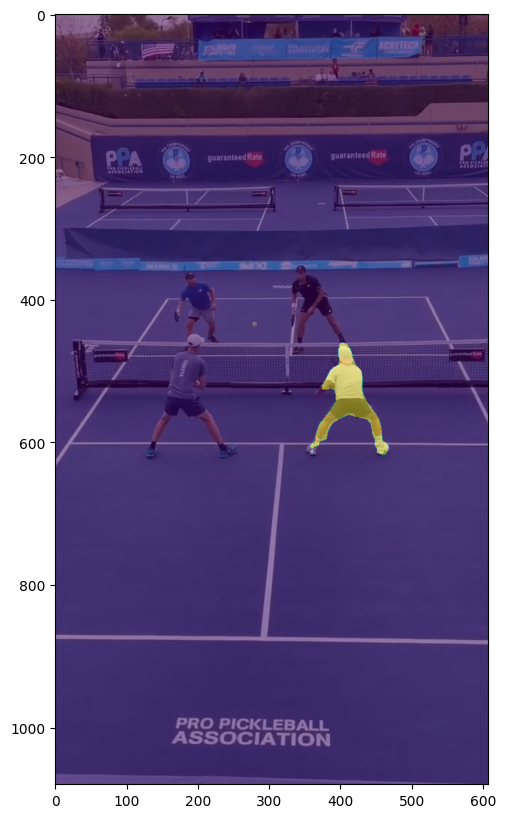

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.imshow(mask[0, iou_preds.argmax()].detach().cpu() > 0, alpha=0.5)
plt.show()